In this notebook, different plots are drawn to visualize the data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt #for displaying plots
import pandas as pd
import seaborn as sns
import tensorflow as tf
import datetime
import random
import properscoring as ps
from scipy import stats
from pathlib import Path
from scipy.stats import norm
import os

# Setup

In [2]:
# setting a seed to ensure reproducability and consistency
random.seed(16)
np.random.seed(16)
tf.random.set_seed(16)

In [3]:
plt.rcParams.update({'font.size': 14})

In [4]:
# Change Working Directory
os.chdir("..")
print(os.getcwd()) # print current working directory

c:\Users\aisti\OneDrive\Dokumente\Uni\Bachelorarbeit\Probabilistic-Forecasting-of-Bicycle-Counts-in-Karlsruhe-with-Neural-Networks


In [5]:
df = pd.read_csv(r"data\bike_data_enhanced_without_lockdown_data.csv")

In [6]:
#save a copy of the raw data
df_raw = df.copy()

In [7]:
# change date column to datetime
df['date'] = pd.to_datetime(df['date'])

df.head()

,date,bike_count,temperature,humidity,windspeed,wind_direction,visibility,precipitation,sun,windspeed_max,precip_indic,precip_type,school_holiday,school_holiday_indicator,public_holiday,public_holiday_indicator,holiday_indicator,is_workday,season
0,2012-04-25,4593.0,12.038889,65.611111,3.033333,183.333333,53611.111111,0.0,294,12.0,0.0,0.0,No Holiday,0,No Holiday,0,0,1,0
1,2012-04-26,5849.0,14.194444,66.111111,2.844444,249.444444,52555.555556,0.0,176,10.0,0.0,0.0,No Holiday,0,No Holiday,0,0,1,0
2,2012-04-27,5846.0,15.233333,68.666667,1.505556,235.000000,45055.555556,0.1,373,5.0,0.0,0.0,No Holiday,0,No Holiday,0,0,1,0
3,2012-04-28,4261.0,22.200000,53.444444,2.700000,153.888889,41500.000000,0.0,678,8.0,0.0,0.0,No Holiday,0,No Holiday,0,0,0,0
4,2012-04-29,1901.0,17.994444,62.222222,3.950000,214.444444,52777.777778,3.7,319,16.0,0.0,0.0,No Holiday,0,No Holiday,0,0,0,0


In [8]:
df.tail()

,date,bike_count,temperature,humidity,windspeed,wind_direction,visibility,precipitation,sun,windspeed_max,precip_indic,precip_type,school_holiday,school_holiday_indicator,public_holiday,public_holiday_indicator,holiday_indicator,is_workday,season
3910,2024-01-21,994.0,-1.500000,87.666667,1.587500,187.500000,14942.500000,0.0,191,7.7,0.0,0.0,No Holiday,0,No Holiday,0,0,0,3
3911,2024-01-22,3398.0,7.479167,76.791667,7.075000,223.750000,47245.416667,5.4,0,18.0,1.0,6.0,No Holiday,0,No Holiday,0,0,1,3
3912,2024-01-23,4427.0,8.358333,74.541667,7.250000,231.250000,38257.916667,0.5,164,16.6,0.5,3.0,No Holiday,0,No Holiday,0,0,1,3
3913,2024-01-24,4124.0,11.945833,72.291667,8.350000,234.583333,45765.833333,1.9,7,18.8,0.0,0.0,No Holiday,0,No Holiday,0,0,1,3
3914,2024-01-25,4594.0,9.366667,85.083333,3.345833,229.583333,23374.583333,1.0,220,7.5,0.0,0.0,No Holiday,0,No Holiday,0,0,1,3


In [9]:
len(df)

3915

In [10]:
df.describe()

,date,bike_count,temperature,humidity,windspeed,wind_direction,visibility,precipitation,sun,windspeed_max,precip_indic,precip_type,school_holiday_indicator,public_holiday_indicator,holiday_indicator,is_workday,season
count,3915,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000
mean,2017-12-21 21:15:35.172413696,4700.835816,12.468751,73.532114,3.466377,177.155465,33354.532863,1.570779,306.774457,9.523780,0.192912,1.167816,0.231673,0.033461,0.248531,0.685313,1.501149
min,2012-04-25 00:00:00,273.000000,-7.827778,31.277778,0.600000,16.666667,207.777778,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2014-12-29 12:00:00,3222.000000,6.397222,63.361111,2.127778,131.111111,20551.111111,0.000000,31.000000,6.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2017-09-03 00:00:00,4862.000000,12.411111,75.000000,3.116667,207.777778,34241.666667,0.000000,246.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
75%,2021-05-21 12:00:00,6182.000000,18.669444,84.333333,4.338889,229.444444,45731.666667,1.100000,545.000000,11.700000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
max,2024-01-25 00:00:00,10200.000000,31.794444,100.000000,12.233333,340.000000,71937.777778,58.300000,909.000000,31.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,3.000000
std,NaN,1922.055154,7.651280,13.795854,1.814267,69.167709,16075.483974,3.990632,278.571794,3.949804,0.384292,2.325166,0.421955,0.179860,0.432217,0.464450,1.107270


# Redrawing Plots

In [11]:
base_path_plots = Path(r"Figures\(02) Plots")

<Axes: xlabel='date', ylabel='bike_count'>

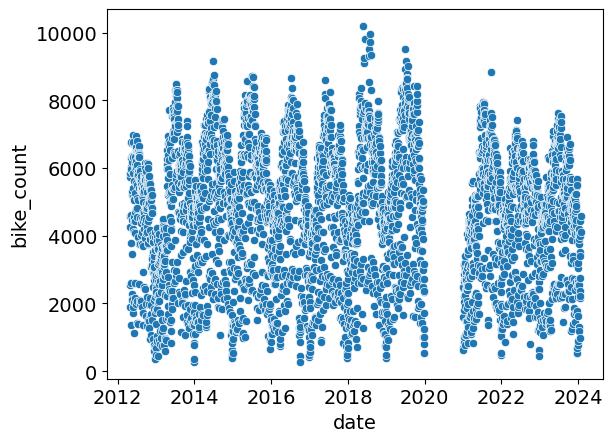

In [12]:
sns.scatterplot(data=df, x='date', y='bike_count') 

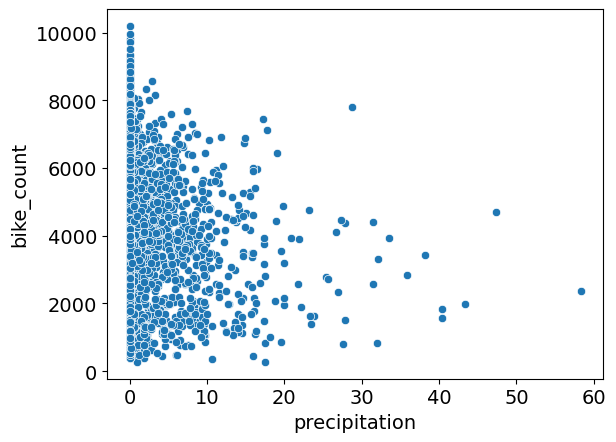

In [13]:
rain_plot_no_reg = sns.scatterplot(data=df, x='precipitation', y='bike_count') 
rain_plot_no_reg.figure.savefig( base_path_plots / "rain_plot_no_reg.png" )

p-value: 1.3244290824205739e-45


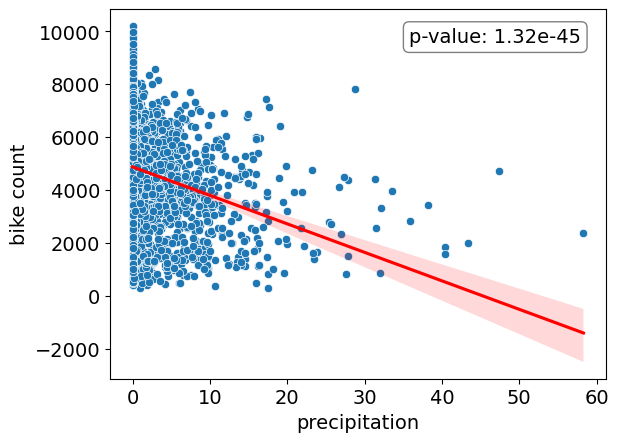

In [14]:
rain_plot = sns.scatterplot(data=df, x='precipitation', y='bike_count') 
sns.regplot(data=df, x='precipitation', y='bike_count', scatter=False, color='red')
# Calculate the p-value for the regression
slope, intercept, r_value, p_value, std_err = stats.linregress(df['precipitation'], df['bike_count'])
print(f'p-value: {p_value}')
# Add the p-value to the plot
plt.text(0.95, 0.95, f'p-value: {p_value:.2e}', transform=rain_plot.transAxes, verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.ylabel('bike count')
plt.xlabel('precipitation')
rain_plot.figure.savefig(base_path_plots / "rain_plot.png")


In [15]:
# Filter the dataframe for Mondays
df_mondays = df[df['date'].dt.weekday == 0]

p-value: 9.716909774924153e-07


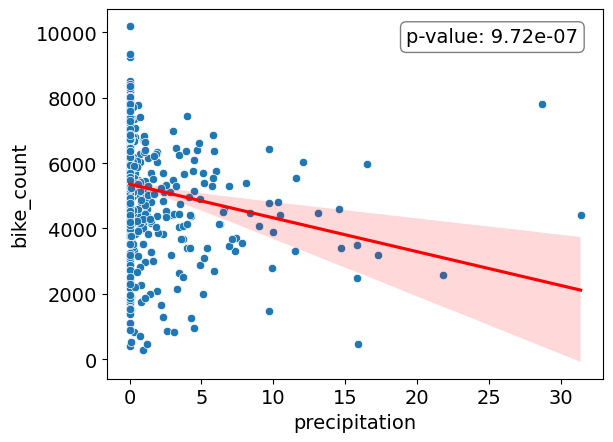

In [16]:
rain_plot = sns.scatterplot(data=df_mondays, x='precipitation', y='bike_count') 
sns.regplot(data=df_mondays, x='precipitation', y='bike_count', scatter=False, color='red')

slope, intercept, r_value, p_value, std_err = stats.linregress(df_mondays['precipitation'], df_mondays['bike_count'])
print(f'p-value: {p_value}')
plt.text(0.95, 0.95, f'p-value: {p_value:.2e}', transform=rain_plot.transAxes, verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

rain_plot.figure.savefig(base_path_plots / "rain_plot_mondays.png")


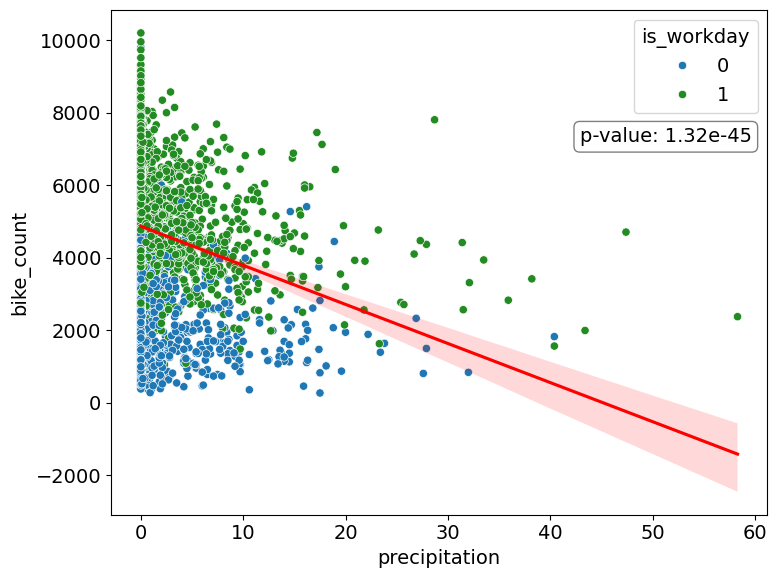

In [17]:
plt.figure(figsize=(8, 6))
rain_plot = sns.scatterplot(data=df, x='precipitation', y='bike_count', hue='is_workday', palette={0: sns.color_palette()[0], 1: '#228b22'})
sns.regplot(data=df, x='precipitation', y='bike_count', scatter=False, color='red')

slope, intercept, r_value, p_value, std_err = stats.linregress(df['precipitation'], df['bike_count'])

# Legend
legend = plt.legend(loc='upper right', title = 'is_workday')

# Get the legend's bounding box in display coordinates
legend_bbox = legend.get_window_extent()

# Convert the bounding box coordinates to the axes coordinate system
inv = rain_plot.transAxes.inverted()
legend_bbox_axes = inv.transform(legend_bbox)

# Coordinates just below the legend (slightly below the bottom of the legend box)
plt.text(
    legend_bbox_axes[0][0]- 0.07, legend_bbox_axes[0][1] - 0.01,  
    f'p-value: {p_value:.2e}', 
    transform=rain_plot.transAxes, 
    verticalalignment='top', 
    horizontalalignment='left', 
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.5)
)
plt.ylabel('bike_count')
plt.xlabel('precipitation')
plt.tight_layout()
rain_plot.figure.savefig(base_path_plots / "rain_plot_workday.png")



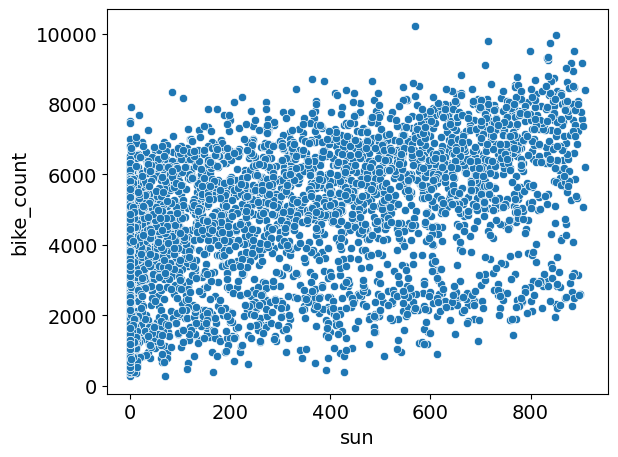

In [18]:
sun_plot_no_reg = sns.scatterplot(data=df, x='sun', y='bike_count') 
plt.tight_layout()
sun_plot_no_reg.figure.savefig(base_path_plots / "sun_plot_no_reg.png")

p-value: 4.507651489448186e-173


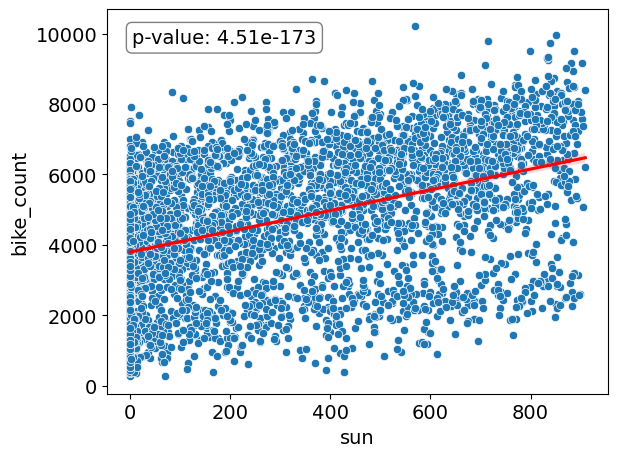

In [19]:
sun_plot = sns.scatterplot(data=df, x='sun', y='bike_count') 
sns.regplot(data=df, x='sun', y='bike_count', scatter=False, color='red')
plt.tight_layout()
# Calculate the p-value for the regression
slope, intercept, r_value, p_value, std_err = stats.linregress(df['sun'], df['bike_count'])
print(f'p-value: {p_value}')
# Add the p-value to the plot
plt.text(0.05, 0.95, f'p-value: {p_value:.2e}', transform=sun_plot.transAxes, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

sun_plot.figure.savefig(base_path_plots / "sun_plot.png")


p-value: 6.437276303178596e-39


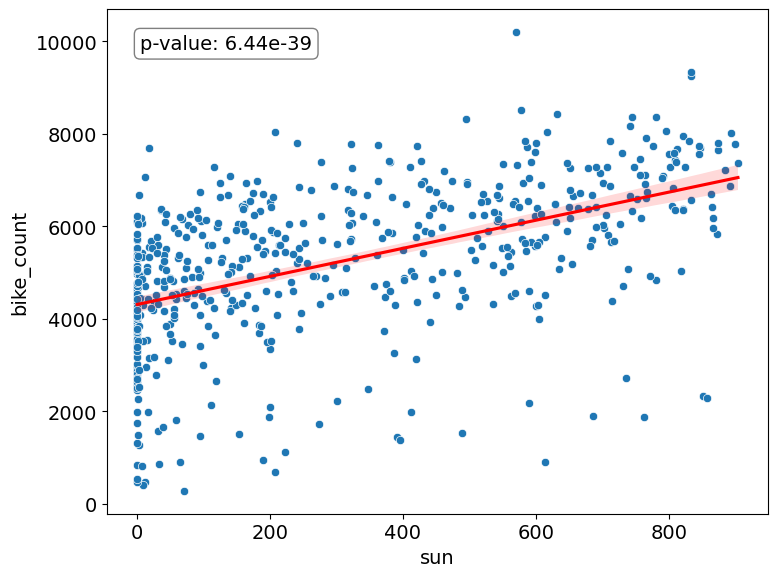

In [20]:
plt.figure(figsize=(8, 6))

sun_plot = sns.scatterplot(data=df_mondays, x='sun', y='bike_count') 
sns.regplot(data=df_mondays, x='sun', y='bike_count', scatter=False, color='red')
plt.tight_layout()
# Calculate the p-value for the regression
slope, intercept, r_value, p_value, std_err = stats.linregress(df_mondays['sun'], df_mondays['bike_count'])
print(f'p-value: {p_value}')
# Add the p-value to the plot
plt.text(0.05, 0.95, f'p-value: {p_value:.2e}', transform=sun_plot.transAxes, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.tight_layout()
sun_plot.figure.savefig(base_path_plots / "sun_plot_mondays.png")


p-value: 4.507651489448186e-173


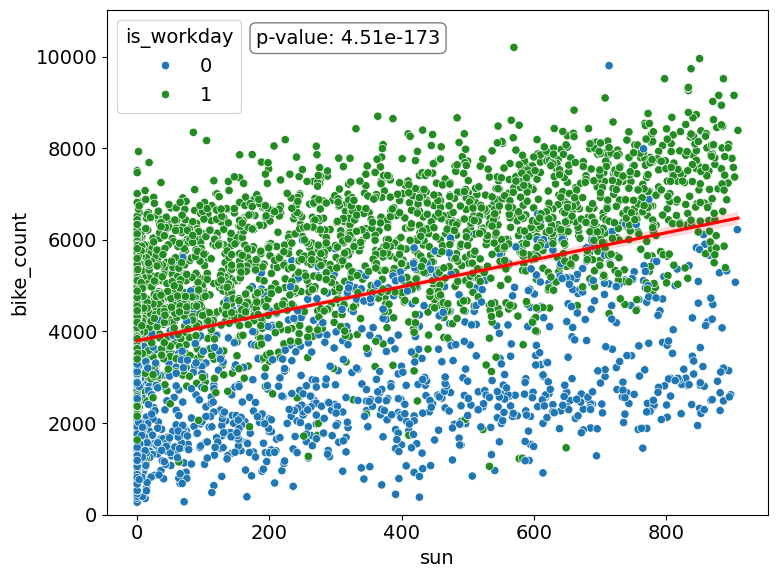

In [21]:
plt.figure(figsize=(8, 6))
sun_plot = sns.scatterplot(data=df, x='sun', y='bike_count', hue='is_workday', palette={0: sns.color_palette()[0], 1: '#228b22'}) 
sns.regplot(data=df, x='sun', y='bike_count', scatter=False, color='red')
slope, intercept, r_value, p_value, std_err = stats.linregress(df['sun'], df['bike_count'])
print(f'p-value: {p_value}')
plt.ylim(0, 1.08 * df['bike_count'].max())
plt.text(0.225, 0.963, f'p-value: {p_value:.2e}', transform=sun_plot.transAxes, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.tight_layout()
plt.ylabel('bike_count')
plt.xlabel('sun')
sun_plot.figure.savefig(base_path_plots / "sun_plot_workday.png")

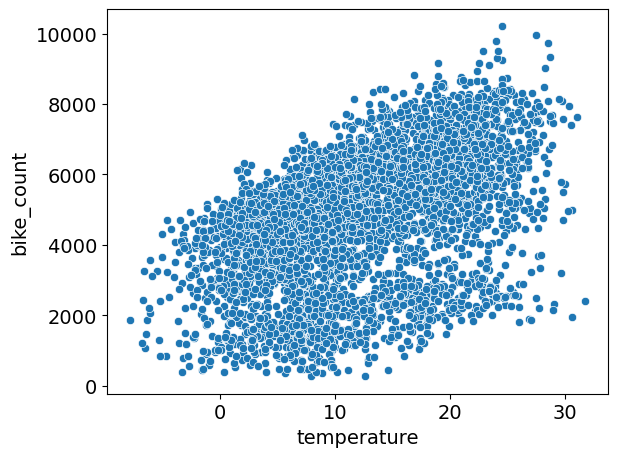

In [22]:
temp_plot_no_reg = sns.scatterplot(data=df, x='temperature', y='bike_count') 
plt.tight_layout()
temp_plot_no_reg.figure.savefig(base_path_plots / "temp_plot_no_reg.png")

p-value: 4.2990283512712113e-218


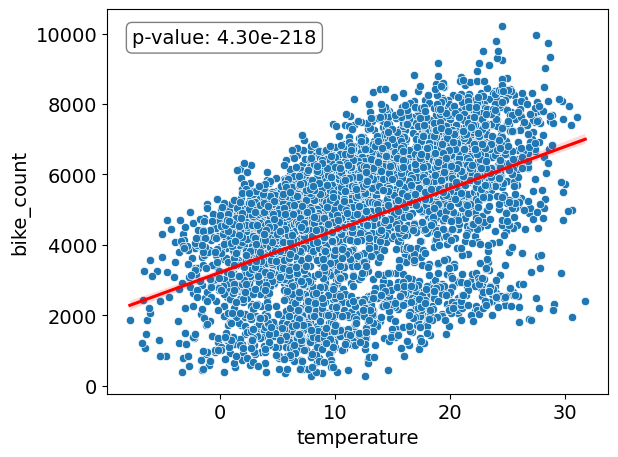

In [23]:
temp_plot = sns.scatterplot(data=df, x='temperature', y='bike_count') 
sns.regplot(data=df, x='temperature', y='bike_count', scatter=False, color='red')
slope, intercept, r_value, p_value, std_err = stats.linregress(df['temperature'], df['bike_count'])
print(f'p-value: {p_value}')
plt.text(0.05, 0.95, f'p-value: {p_value:.2e}', transform=temp_plot.transAxes, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.tight_layout()
temp_plot.figure.savefig(base_path_plots / "temp_plot.png")

p-value: 4.652300012252087e-52


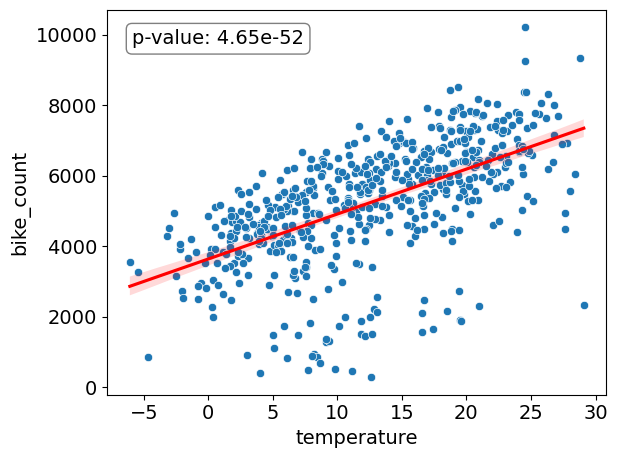

In [24]:
temp_plot = sns.scatterplot(data=df_mondays, x='temperature', y='bike_count') 
sns.regplot(data=df_mondays, x='temperature', y='bike_count', scatter=False, color='red')
slope, intercept, r_value, p_value, std_err = stats.linregress(df_mondays['temperature'], df_mondays['bike_count'])
print(f'p-value: {p_value}')
plt.text(0.05, 0.95, f'p-value: {p_value:.2e}', transform=temp_plot.transAxes, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.tight_layout()
temp_plot.figure.savefig(base_path_plots / "temp_plot_mondays.png")

p-value: 4.2990283512712113e-218


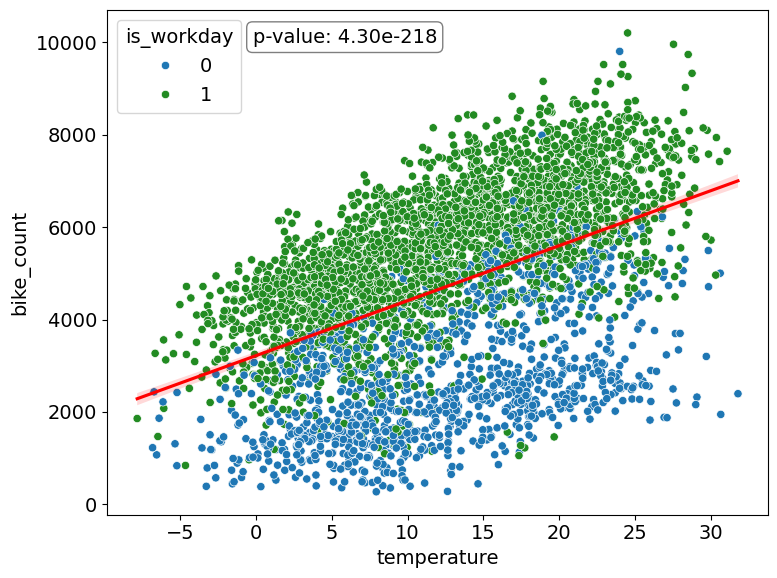

In [25]:
plt.figure(figsize=(8, 6))
temp_plot = sns.scatterplot(data=df, x='temperature', y='bike_count', hue='is_workday', palette={0: sns.color_palette()[0], 1: '#228b22'}) 
sns.regplot(data=df, x='temperature', y='bike_count', scatter=False, color='red')
slope, intercept, r_value, p_value, std_err = stats.linregress(df['temperature'], df['bike_count'])
print(f'p-value: {p_value}')
plt.text(0.22, 0.965, f'p-value: {p_value:.2e}', transform=temp_plot.transAxes, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.ylabel('bike_count')
plt.xlabel('temperature')
plt.tight_layout()
temp_plot.figure.savefig(base_path_plots / "temp_plot_workday.png")

In [26]:
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

C:\Users\aisti\AppData\Local\Temp\ipykernel_59900\966339646.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  weekday_plot = sns.barplot(data=df, x= df['date'].dt.weekday , y = 'bike_count', palette="tab10")
C:\Users\aisti\AppData\Local\Temp\ipykernel_59900\966339646.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  weekday_plot.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation = 45)


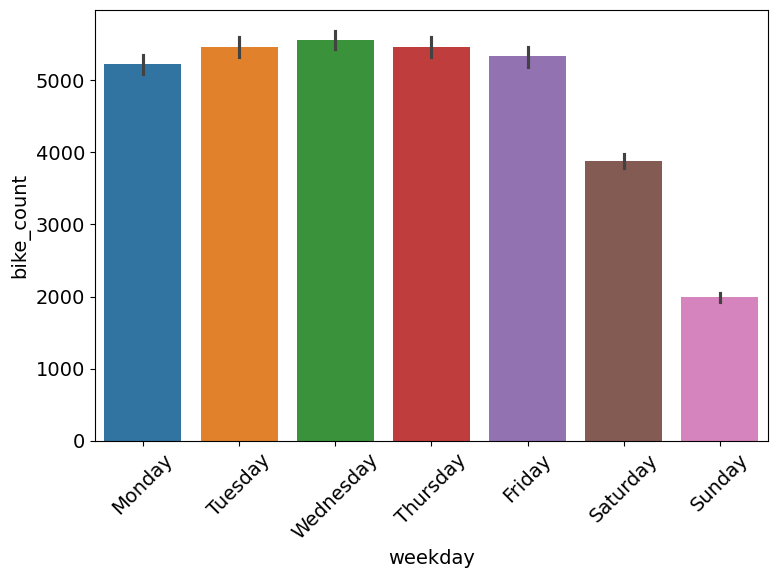

In [27]:
plt.figure(figsize=(8, 6))

weekday_plot = sns.barplot(data=df, x= df['date'].dt.weekday , y = 'bike_count', palette="tab10")

weekday_plot.set(xlabel = 'weekday')

plt.ylabel('bike_count')
plt.xlabel('weekday')
weekday_plot.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation = 45)
plt.tight_layout()
plt.show()

In [28]:
weekday_plot.figure.savefig(base_path_plots / "weekday_plot.png")

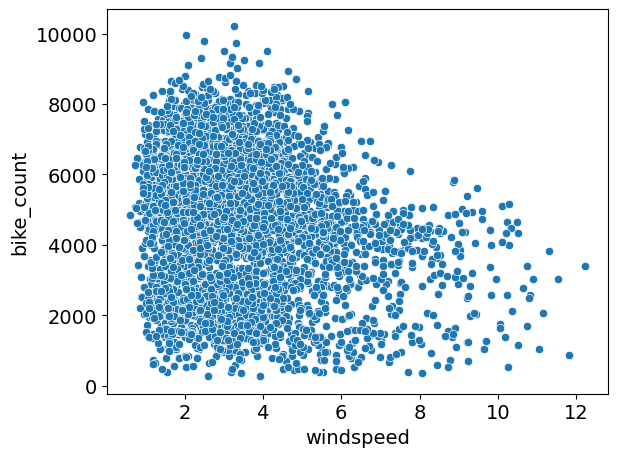

In [29]:
windspeed_plot_no_reg = sns.scatterplot(data=df, x='windspeed', y='bike_count') 
plt.tight_layout()
windspeed_plot_no_reg.figure.savefig(base_path_plots / "windspeed_plot_no_reg.png")

p-value: 9.76817606237365e-45


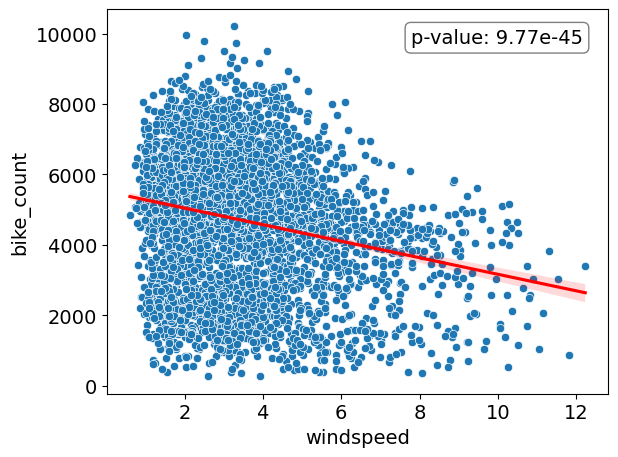

In [30]:
windspeed_plot = sns.scatterplot(data=df, x='windspeed', y='bike_count') 
sns.regplot(data=df, x='windspeed', y='bike_count', scatter=False, color='red')
slope, intercept, r_value, p_value, std_err = stats.linregress(df['windspeed'], df['bike_count'])
print(f'p-value: {p_value}')
plt.text(0.95, 0.95, f'p-value: {p_value:.2e}', transform=windspeed_plot.transAxes, verticalalignment='top', horizontalalignment = 'right', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.tight_layout()
windspeed_plot.figure.savefig(base_path_plots / "windspeed_plot.png")

p-value: 4.1126368354792746e-11


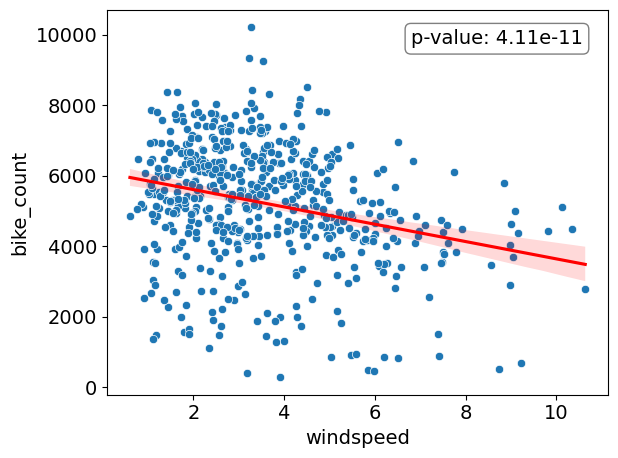

In [31]:
windspeed_plot = sns.scatterplot(data=df_mondays, x='windspeed', y='bike_count') 
sns.regplot(data=df_mondays, x='windspeed', y='bike_count', scatter=False, color='red')
slope, intercept, r_value, p_value, std_err = stats.linregress(df_mondays['windspeed'], df_mondays['bike_count'])
print(f'p-value: {p_value}')
plt.text(0.95, 0.95, f'p-value: {p_value:.2e}', transform=windspeed_plot.transAxes, verticalalignment='top', horizontalalignment = 'right', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.tight_layout()
windspeed_plot.figure.savefig(base_path_plots / "windspeed_plot_mondays.png")

p-value: 9.76817606237365e-45


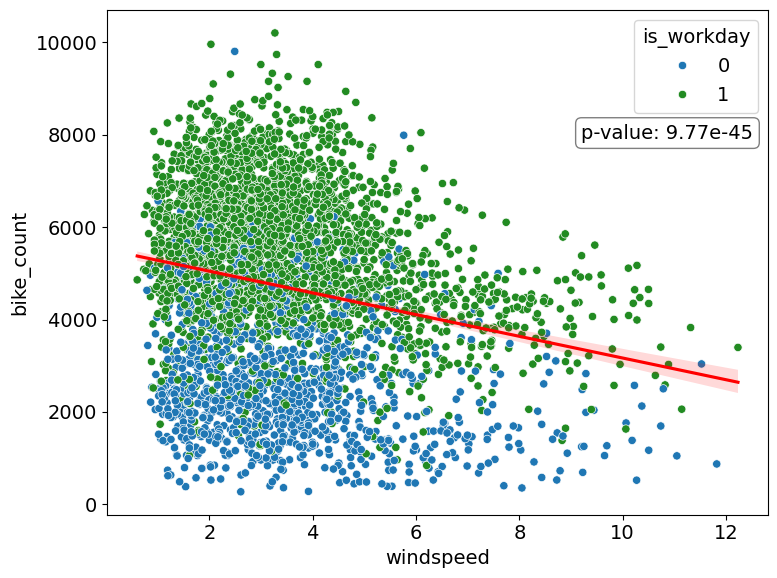

In [32]:
plt.figure(figsize=(8, 6))
windspeed_plot = sns.scatterplot(data=df, x='windspeed', y='bike_count', hue='is_workday', palette={0: sns.color_palette()[0], 1: '#228b22'}) 
sns.regplot(data=df, x='windspeed', y='bike_count', scatter=False, color='red')
slope, intercept, r_value, p_value, std_err = stats.linregress(df['windspeed'], df['bike_count'])
print(f'p-value: {p_value}')
plt.text(0.978, 0.775, f'p-value: {p_value:.2e}', transform=windspeed_plot.transAxes, verticalalignment='top', horizontalalignment = 'right', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.ylabel('bike_count')
plt.xlabel('windspeed')
plt.tight_layout()
windspeed_plot.figure.savefig(base_path_plots / "windspeed_plot_workday.png")

C:\Users\aisti\AppData\Local\Temp\ipykernel_59900\2198845851.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  season_plot = sns.barplot(data=df, x= 'season' , y = 'bike_count', palette="tab10")


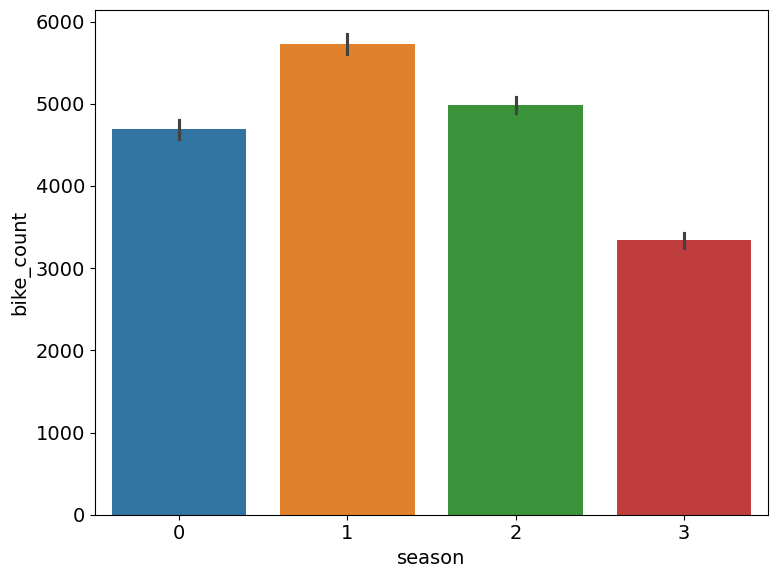

In [33]:
plt.figure(figsize=(8, 6))

season_plot = sns.barplot(data=df, x= 'season' , y = 'bike_count', palette="tab10")
plt.ylabel('bike_count')
plt.xlabel('season')
plt.tight_layout()
season_plot.figure.savefig(base_path_plots / "season_plot.png")

C:\Users\aisti\AppData\Local\Temp\ipykernel_59900\3028811836.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  public_holiday_plot = sns.barplot(data=df, x= 'public_holiday_indicator' , y = 'bike_count', palette="tab10")


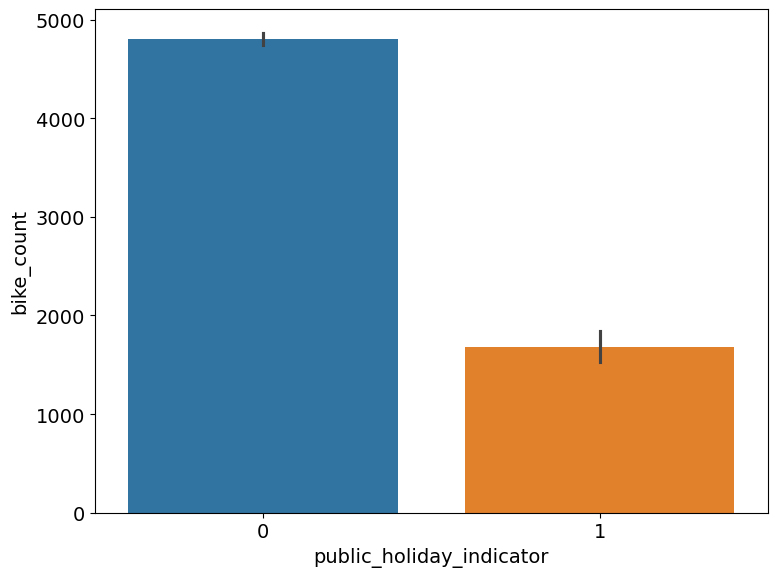

In [34]:
plt.figure(figsize=(8, 6))
public_holiday_plot = sns.barplot(data=df, x= 'public_holiday_indicator' , y = 'bike_count', palette="tab10")
plt.ylabel('bike_count')
plt.xlabel('public_holiday_indicator')
plt.tight_layout()
public_holiday_plot.figure.savefig(base_path_plots / "public_holiday_plot.png")

C:\Users\aisti\AppData\Local\Temp\ipykernel_59900\2634414219.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  workday_plot = sns.barplot(data=df, x= 'is_workday' , y = 'bike_count', palette="tab10")


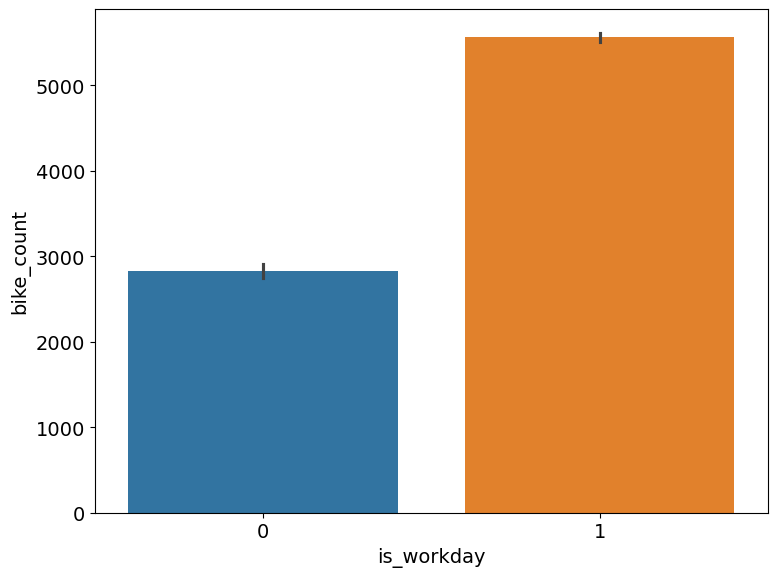

In [35]:
plt.figure(figsize=(8, 6))

workday_plot = sns.barplot(data=df, x= 'is_workday' , y = 'bike_count', palette="tab10")
plt.ylabel('bike_count')
plt.xlabel('is_workday')
plt.tight_layout()
workday_plot.figure.savefig(base_path_plots / "workday_plot.png")

In [36]:
df.dtypes

date                        datetime64[ns]
bike_count                         float64
temperature                        float64
humidity                           float64
windspeed                          float64
wind_direction                     float64
visibility                         float64
precipitation                      float64
sun                                  int64
windspeed_max                      float64
precip_indic                       float64
precip_type                        float64
school_holiday                      object
school_holiday_indicator             int64
public_holiday                      object
public_holiday_indicator             int64
holiday_indicator                    int64
is_workday                           int64
season                               int64
dtype: object

In [37]:
df_2014 = df[df['date'].dt.year == 2014]

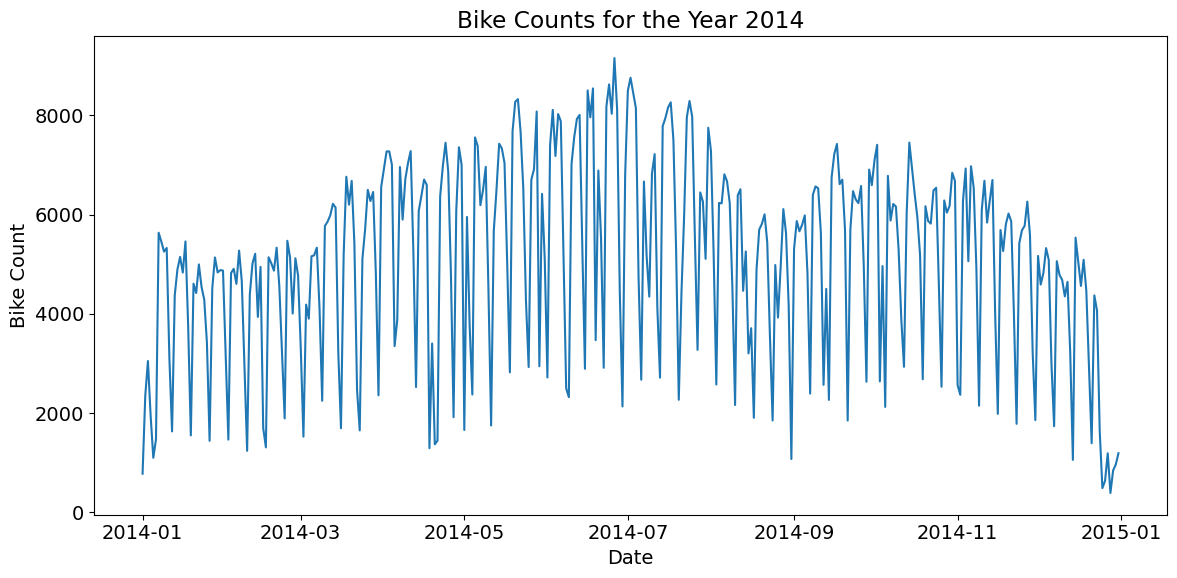

In [38]:
# Plot the bike counts for the year 2014
plt.figure(figsize=(12, 6))
bikes_2014 = sns.lineplot(data=df_2014, x='date', y='bike_count')
plt.title('Bike Counts for the Year 2014')
plt.xlabel('Date')
plt.ylabel('Bike Count')
plt.tight_layout()
plt.show()

bikes_2014.figure.savefig(base_path_plots / "bikes_2014.png")

In [39]:
df.columns

Index(['date', 'bike_count', 'temperature', 'humidity', 'windspeed',
       'wind_direction', 'visibility', 'precipitation', 'sun', 'windspeed_max',
       'precip_indic', 'precip_type', 'school_holiday',
       'school_holiday_indicator', 'public_holiday',
       'public_holiday_indicator', 'holiday_indicator', 'is_workday',
       'season'],
      dtype='object')

In [40]:
df.describe()

,date,bike_count,temperature,humidity,windspeed,wind_direction,visibility,precipitation,sun,windspeed_max,precip_indic,precip_type,school_holiday_indicator,public_holiday_indicator,holiday_indicator,is_workday,season
count,3915,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000
mean,2017-12-21 21:15:35.172413696,4700.835816,12.468751,73.532114,3.466377,177.155465,33354.532863,1.570779,306.774457,9.523780,0.192912,1.167816,0.231673,0.033461,0.248531,0.685313,1.501149
min,2012-04-25 00:00:00,273.000000,-7.827778,31.277778,0.600000,16.666667,207.777778,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2014-12-29 12:00:00,3222.000000,6.397222,63.361111,2.127778,131.111111,20551.111111,0.000000,31.000000,6.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2017-09-03 00:00:00,4862.000000,12.411111,75.000000,3.116667,207.777778,34241.666667,0.000000,246.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
75%,2021-05-21 12:00:00,6182.000000,18.669444,84.333333,4.338889,229.444444,45731.666667,1.100000,545.000000,11.700000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
max,2024-01-25 00:00:00,10200.000000,31.794444,100.000000,12.233333,340.000000,71937.777778,58.300000,909.000000,31.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,3.000000
std,NaN,1922.055154,7.651280,13.795854,1.814267,69.167709,16075.483974,3.990632,278.571794,3.949804,0.384292,2.325166,0.421955,0.179860,0.432217,0.464450,1.107270


# CRPS visualization

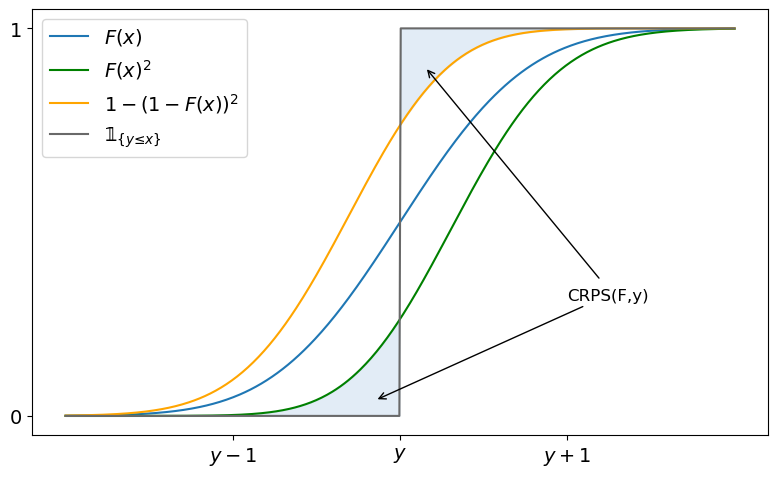

In [41]:
# Define the indicator function
def indicator_function(x, y):
    return np.where(x >= y, 1, 0)

# Define the range of x values and the target y value
y = 2
x = np.linspace(y - 2, y + 2, 500)

# Evaluate the indicator function
indicator_values = indicator_function(x, y)

# Compute the normal CDF over the same x range
mu = 2
sigma = 0.6 
normal_cdf_values = norm.cdf(x, loc=mu, scale=sigma)
f_x_2 = normal_cdf_values**2
line_up = 1-(1-normal_cdf_values)**2

# Plot
plt.figure(figsize=(8, 5))




# Plot the normal CDF
plt.plot(x, normal_cdf_values, color='#1f77b4', label=r"$F(x)$")

# Plot the square of the normal CDF
plt.plot(x, f_x_2, color='green', label=r"$F(x)^2$")

# Plot 1-(1-F(x))^2
plt.plot(x, line_up, color='orange', label=r"$1-(1-F(x))^2$")

# Plot the indicator function
plt.plot(x, indicator_values, color='dimgrey', label=r"$𝟙_{\{y≤x\}}$")

plt.fill_between(x[x<=y], f_x_2[x<=y], color='#c6dbef', alpha=0.5)
plt.fill_between(x[x>=y], line_up[x>=y], y2=1, color='#c6dbef', alpha=0.5)

plt.annotate('CRPS(F,y)', 
             xy=(y - 0.15, 0.04), xycoords='data', 
             xytext=(y + 1, 0.3), textcoords='data',
             arrowprops=dict(facecolor='black', arrowstyle='->', lw=1),
             fontsize=12)

plt.annotate('', 
             xy=(y + 0.15, 0.9), xycoords='data', 
             xytext=(y + 1.2, 0.35), textcoords='data',
             arrowprops=dict(facecolor='black', arrowstyle='->', lw=1),
             fontsize=12)

# Set custom ticks on the x-axis for y-1, y, and y+1
plt.xticks([y - 1, y, y + 1], labels=[r'$y-1$', r'$y$', r'$y+1$'])

# Set y-axis limits and ticks
plt.yticks([0, 1], labels=['0', '1'])

plt.legend()
plt.tight_layout()
plt.savefig(base_path_plots / "crps_visualisation.png", dpi=96)
plt.show()
plt.close()

In [42]:
df['day_of_week'] = df['date'].dt.dayofweek

In [43]:
df = df.drop(columns=['precip_type'])

In [44]:
df.head()

,date,bike_count,temperature,humidity,windspeed,wind_direction,visibility,precipitation,sun,windspeed_max,precip_indic,school_holiday,school_holiday_indicator,public_holiday,public_holiday_indicator,holiday_indicator,is_workday,season,day_of_week
0,2012-04-25,4593.0,12.038889,65.611111,3.033333,183.333333,53611.111111,0.0,294,12.0,0.0,No Holiday,0,No Holiday,0,0,1,0,2
1,2012-04-26,5849.0,14.194444,66.111111,2.844444,249.444444,52555.555556,0.0,176,10.0,0.0,No Holiday,0,No Holiday,0,0,1,0,3
2,2012-04-27,5846.0,15.233333,68.666667,1.505556,235.000000,45055.555556,0.1,373,5.0,0.0,No Holiday,0,No Holiday,0,0,1,0,4
3,2012-04-28,4261.0,22.200000,53.444444,2.700000,153.888889,41500.000000,0.0,678,8.0,0.0,No Holiday,0,No Holiday,0,0,0,0,5
4,2012-04-29,1901.0,17.994444,62.222222,3.950000,214.444444,52777.777778,3.7,319,16.0,0.0,No Holiday,0,No Holiday,0,0,0,0,6


In [45]:
df['precip_indic'] = df['precipitation'].apply(lambda x: 1 if x > 0 else 0)

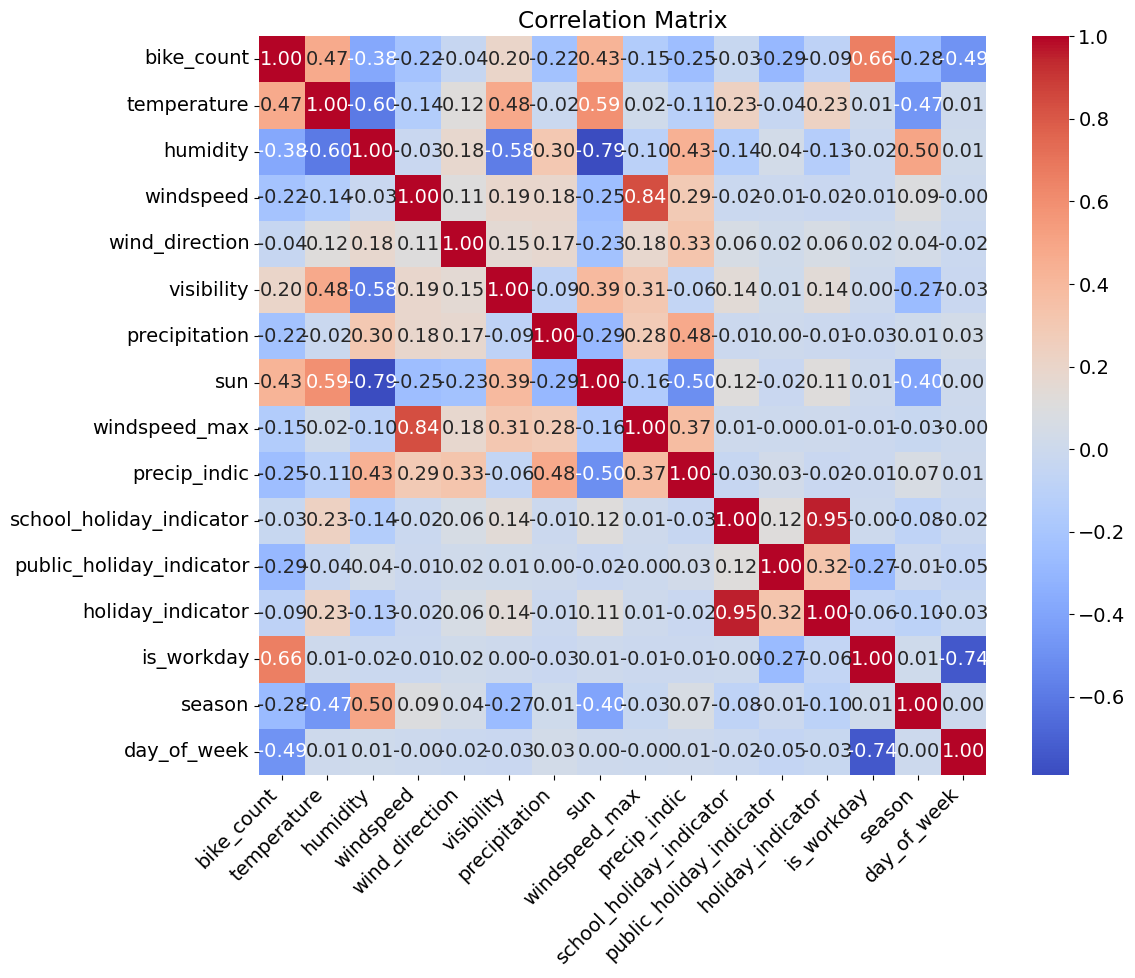

In [46]:
# Calculate the correlation matrix of the dataset
correlation_matrix = df.corr(numeric_only=True)  

plt.figure(figsize=(12, 10))
# Plot the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.gcf().savefig( base_path_plots / "correlation_matrix.png", dpi=96)
plt.show()


In [47]:
df.head()

,date,bike_count,temperature,humidity,windspeed,wind_direction,visibility,precipitation,sun,windspeed_max,precip_indic,school_holiday,school_holiday_indicator,public_holiday,public_holiday_indicator,holiday_indicator,is_workday,season,day_of_week
0,2012-04-25,4593.0,12.038889,65.611111,3.033333,183.333333,53611.111111,0.0,294,12.0,0,No Holiday,0,No Holiday,0,0,1,0,2
1,2012-04-26,5849.0,14.194444,66.111111,2.844444,249.444444,52555.555556,0.0,176,10.0,0,No Holiday,0,No Holiday,0,0,1,0,3
2,2012-04-27,5846.0,15.233333,68.666667,1.505556,235.000000,45055.555556,0.1,373,5.0,1,No Holiday,0,No Holiday,0,0,1,0,4
3,2012-04-28,4261.0,22.200000,53.444444,2.700000,153.888889,41500.000000,0.0,678,8.0,0,No Holiday,0,No Holiday,0,0,0,0,5
4,2012-04-29,1901.0,17.994444,62.222222,3.950000,214.444444,52777.777778,3.7,319,16.0,1,No Holiday,0,No Holiday,0,0,0,0,6


C:\Users\aisti\AppData\Local\Temp\ipykernel_59900\1314529855.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


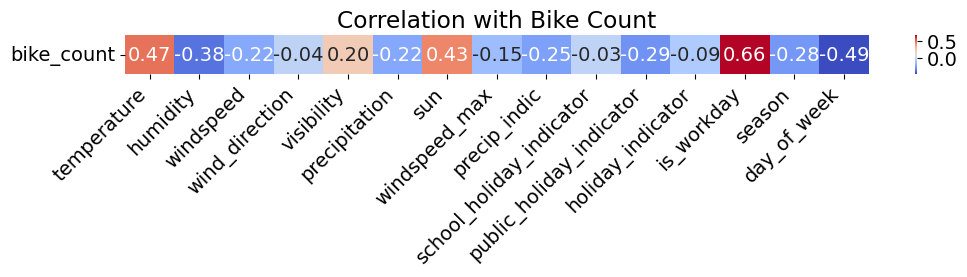

In [48]:

bike_count_corr = correlation_matrix.loc['bike_count'].drop('bike_count')

plt.figure(figsize=(12, 0.5))
sns.heatmap(bike_count_corr.to_frame().T, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation with Bike Count")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.gcf().savefig(base_path_plots / "correlation_with_bike_count.png", dpi=96)
plt.show()


In [49]:
bike_count_corr_abs = bike_count_corr.abs()

In [50]:
bike_count_corr_abs.sort_values(ascending=False)

is_workday                  0.661067
day_of_week                 0.487359
temperature                 0.473586
sun                         0.426753
humidity                    0.381147
public_holiday_indicator    0.292148
season                      0.278350
precip_indic                0.251488
precipitation               0.223727
windspeed                   0.221558
visibility                  0.199485
windspeed_max               0.150318
holiday_indicator           0.086949
wind_direction              0.036078
school_holiday_indicator    0.034074
Name: bike_count, dtype: float64